<a href="https://colab.research.google.com/github/hwangsaeyeon/dacon/blob/main/other_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/mood/train.csv",index_col=0)
test = pd.read_csv("/content/drive/MyDrive/mood/test.csv",index_col=0)

In [4]:
train = pd.DataFrame(train)

In [5]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

#가설1. education이 높으면 nerdiness가 줄어들 것이다
education이 1인 사람이 nerdiness가 1인 비율이 높았다

In [6]:
row_one = []
row_zero = []
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)
  if train['nerdiness'][i]==0:
    row_zero.append(i)

In [7]:
no1 = len(row_one)
no0 = len(row_zero)
print(len(row_one))
print(len(row_zero))

8303
6697


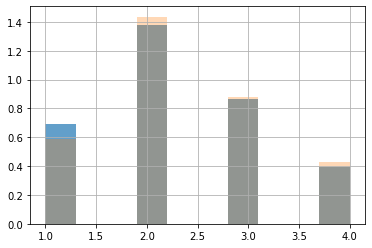

In [8]:
train.loc[row_one,'education'].hist(density=True,alpha=0.7)
train.loc[row_zero,'education'].hist(density=True,alpha=0.3)

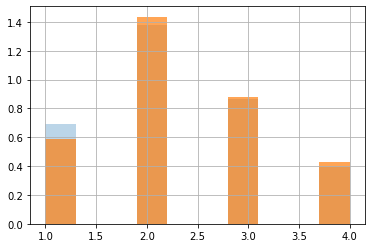

In [9]:
train.loc[row_one,'education'].hist(density=True,alpha=0.3)
train.loc[row_zero,'education'].hist(density=True,alpha=0.7)

In [10]:
edu_low = []
for i in train.index:
  if train['education'][i] == 1:
    edu_low.append(1)
  else:
    edu_low.append(0)
train.loc[:,'edu_low']=edu_low

# 가설2. voted에 따른 nerdiness의 차이가 있을 것이다.
nerdiness가 1인 사람이 voted가 1인 비율이 더 높았다

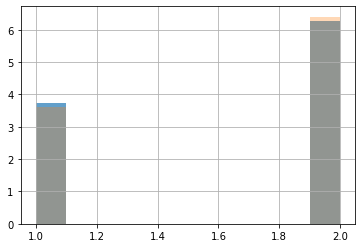

In [11]:
train.loc[row_one,'voted'].hist(density=True,alpha=0.7)
train.loc[row_zero,'voted'].hist(density=True,alpha=0.3)

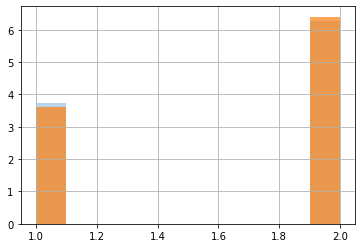

In [12]:
train.loc[row_one,'voted'].hist(density=True,alpha=0.3)
train.loc[row_zero,'voted'].hist(density=True,alpha=0.7)

# 가설3. ASD에 따른 nerdiness의 차이가 있을 것이다.
ASD가 2인 사람이 nerdiness가 0인 비율이 조금 높고, ASD가 1인 사람이 nerdiness가 1인 비율이 조금 높음

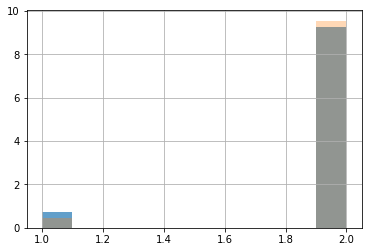

In [13]:
train.loc[row_one,'ASD'].hist(density=True,alpha=0.7)
train.loc[row_zero,'ASD'].hist(density=True,alpha=0.3)

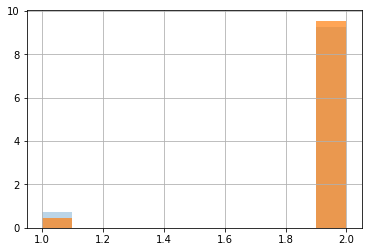

In [ ]:
train.loc[row_one,'ASD'].hist(density=True,alpha=0.3)
train.loc[row_zero,'ASD'].hist(density=True,alpha=0.7)

# 가설4. 왼손잡이와 nerdiness 사이에 유의미한 관계가 있을 것이다

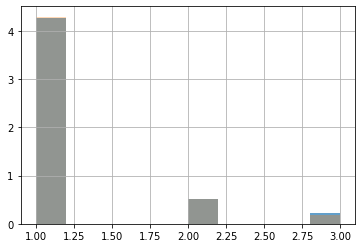

In [ ]:
train.loc[row_one,'hand'].hist(density=True, alpha=0.7)
train.loc[row_zero,'hand'].hist(density=True, alpha=0.3)

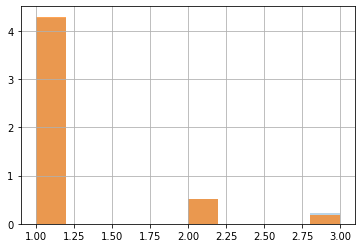

In [ ]:
train.loc[row_one,'hand'].hist(density=True, alpha=0.3)
train.loc[row_zero,'hand'].hist(density=True, alpha=0.7)

nerdiness=0일수록 orientation 1의 값이 높다

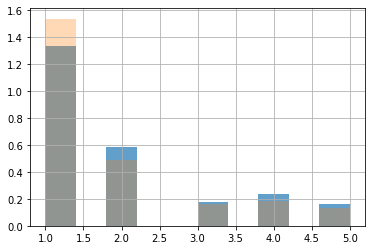

In [ ]:
train.loc[row_one,'orientation'].hist(density=True,alpha=0.7,)
train.loc[row_zero,'orientation'].hist(density=True,alpha=0.3,)

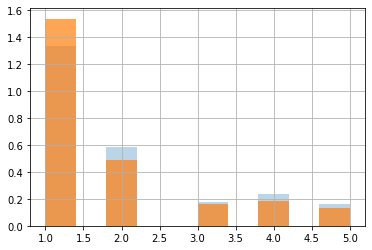

In [ ]:
train.loc[row_one,'orientation'].hist(density=True,alpha=0.3,)
train.loc[row_zero,'orientation'].hist(density=True,alpha=0.7,) 

In [14]:
orientation_one = []
for i in train.index:
  if train['orientation'][i] == 1:
    orientation_one.append(1)
  else:
    orientation_one.append(0)
train.loc[:,'orientation_one'] = orientation_one

# 가설5. vocabulary를 많이 알수록 nerdiness의 비율이 줄어들 것이다.

In [26]:
#6,9,12제외
vocab = ['VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL7', 'VCL8',  'VCL10', 'VCL11',  'VCL13', 'VCL14', 'VCL15', 'VCL16']
vocability1 = []
a=0
for i in vocab:
  ability=0
  for j in row_one:
    if train[i][j] == 1:
      ability+=1
  vocability1.append(ability)
  a+=1

vocability0=[]
a=0
for i in vocab:
  ability=0
  for j in row_zero:
    if train[i][j] == 1:
      ability+=1
  vocability0.append(ability)
  a+=1

In [27]:
print(vocability1)
print(vocability0)

[8012, 7799, 4799, 8099, 7951, 2059, 3850, 7978, 2514, 6669, 7715, 8027, 8166]
[6368, 6026, 3138, 6427, 6259, 1481, 2699, 6363, 1687, 4748, 5878, 6371, 6543]


In [ ]:
vocab = ['VCL6', 'VCL9','VCL12',]
vocability1 = []
a=0
for i in vocab:
  ability=0
  for j in row_one:
    if train[i][j] == 1:
      ability+=1
  vocability1.append(ability/no1)
  a+=1
  
vocability0=[]
a=0
for i in vocab:
  ability=0
  for j in row_zero:
    if train[i][j] == 1:
      ability+=1
  vocability0.append(ability/no0)
  a+=1

In [ ]:
print(vocability1)
print(vocability0)

[0.11056244730820186, 0.07093821510297482, 0.2348548717331085]
[0.09033895774227266, 0.06256532775869793, 0.17978199193668806]


In [15]:
vocab = ['VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL7', 'VCL8',  'VCL10', 'VCL11',  'VCL13', 'VCL14', 'VCL15', 'VCL16']
vocability = []
for i in train.index :
  ability = 0
  for j in vocab: 
    if train[j][i] == 1: 
      ability += 1
  vocability.append(ability)
train.loc[:,'vocability_val'] = vocability

In [16]:
vocab = ['VCL6', 'VCL9','VCL12',]
vocability = []
for i in train.index :
  ability = 0
  for j in vocab: 
    if train[j][i] == 1: 
      ability += 1
  vocability.append(ability)
train.loc[:,'vocability_nonval'] = vocability

# 가설6. 성별과 nerdiness의 관계(일반적으로 여성이 덜 nerdy한..)
nerdiness 1은 3번째 성별이 많았다

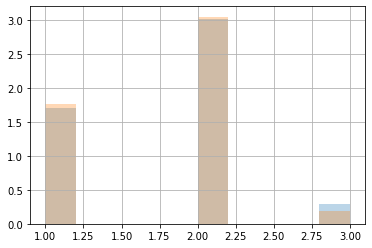

In [ ]:
train.loc[row_one,'gender'].hist(density=True,alpha=0.3,)
train.loc[row_zero,'gender'].hist(density=True,alpha=0.3,) 

In [ ]:
s=0
t=0
for i in train.index: 
  if train['gender'][i]==1:
    s+=train.loc[i]['VCL6']
    s+=train.loc[i]['VCL9']
    s+=train.loc[i]['VCL12']
  elif train['gender'][i] == 2:
    t+=train.loc[i]['VCL6']
    t+=train.loc[i]['VCL9']
    t+=train.loc[i]['VCL12']

In [ ]:
s/sum(train['gender']==1) #male

0.33777520278099654

In [ ]:
t/sum(train['gender']==2) #female

0.39288075821027113

In [17]:
thirdgender = []
for i in train.index:
  if train['gender'][i] == 3:
    thirdgender.append(1)
  else:
    thirdgender.append(0)
train.loc[:,'3rdgender'] = thirdgender 

# 그 외

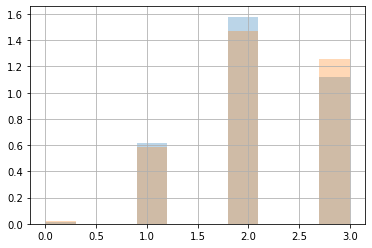

In [ ]:
train.loc[row_one,'urban'].hist(density=True,alpha=0.3,) #blue,suburban
train.loc[row_zero,'urban'].hist(density=True,alpha=0.3,) #orange,urban(도시) 

In [18]:
realurban = []
for i in train.index:
  if train['urban'][i] == 3:
    realurban.append(1)
  else:
    realurban.append(0)
train.loc[:,'real_urban'] = realurban

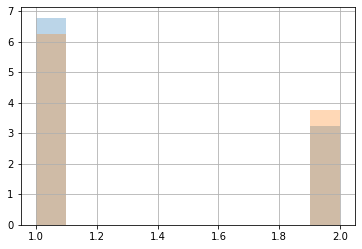

In [ ]:
train.loc[row_one,'engnat'].hist(density=True,alpha=0.3,) #blue,모국어
train.loc[row_zero,'engnat'].hist(density=True,alpha=0.3,) #orange,모국어가 아님 

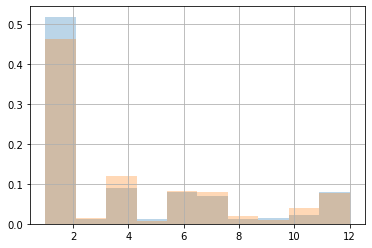

In [ ]:
train.loc[row_one,'religion'].hist(density=True,alpha=0.3,) #blue,1번 종교가 많다 
train.loc[row_zero,'religion'].hist(density=True,alpha=0.3,) #orange,

In [19]:
realigionone = []
for i in train.index:
  if train['religion'][i] == 1:
    realigionone.append(1)
  else:
    realigionone.append(0)
train.loc[:,'realigion_one'] = realigionone

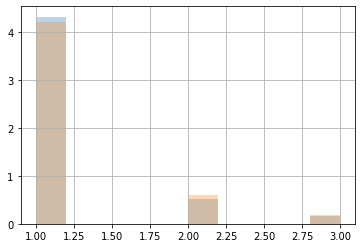

In [ ]:
train.loc[row_one,'married'].hist(density=True,alpha=0.3,) #blue,1-never married가 많다 
train.loc[row_zero,'married'].hist(density=True,alpha=0.3,) #orange,2

In [20]:
nevermarried = []
for i in train.index:
  if train['married'][i] == 1:
    nevermarried.append(1)
  else:
    nevermarried.append(0)
train.loc[:,'never_married'] = nevermarried

# familysize, age

In [39]:
train = train.drop(1019)
train['familysize'].sort_values(ascending=False)

index
9817     39.0
1287     39.0
474      23.0
11274    23.0
5646     19.0
         ... 
14504     NaN
14771     NaN
14894     NaN
14901     NaN
14915     NaN
Name: familysize, Length: 14999, dtype: float64

In [ ]:
row_one = []
row_zero = []
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)
  if train['nerdiness'][i]==0:
    row_zero.append(i)

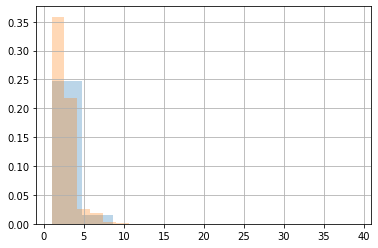

In [ ]:
train.loc[row_one,'familysize'].hist(density=True,alpha=0.3,) #blue,
train.loc[row_zero,'familysize'].hist(density=True,alpha=0.3,) #orange,작은 가족단위가 많음 

In [21]:
small_famsize = []
for i in train.index:
  if train['familysize'][i] <= 3:
    small_famsize.append(1)
  else:
    small_famsize.append(0)
train.loc[:,'small_familysize'] = small_famsize

In [23]:
train = train.drop([9273,6725,4976,14135,1739,])
train['age'].sort_values(ascending=False)

index
4002     123
1019     100
12092     99
6526      88
12574     81
        ... 
3787      13
13936     13
9031      13
9036      13
11834     13
Name: age, Length: 14995, dtype: int64

In [ ]:
train['age'][0]

20

In [28]:
#연령대 구분 
for i in train.index:
  if train['age'][i] >=13 and train['age'][i]<30:
    train.loc[i,'new_age'] = 1
  else:
    train.loc[i,'new_age'] = 0

In [26]:
row_one = []
row_zero = []
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)
  if train['nerdiness'][i]==0:
    row_zero.append(i)

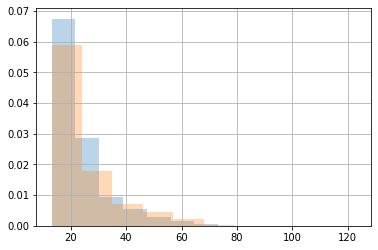

In [ ]:
train.loc[row_one,'age'].hist(density=True,alpha=0.3,) #blue,10대,20대에게서 많이 보임 
train.loc[row_zero,'age'].hist(density=True,alpha=0.3,) #orange,

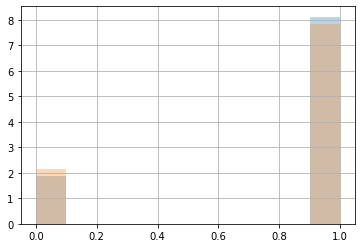

In [29]:
train.loc[row_one,'new_age'].hist(density=True,alpha=0.3,) #blue,10대,20대에게서 많이 보임 
train.loc[row_zero,'new_age'].hist(density=True,alpha=0.3,) #orange,

#시간

In [ ]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness', 'new_age'],
      dtype='object')

In [ ]:
train['introelapse'].sort_values(ascending=False)

index
13840    855030
6318     855030
14665    817147
373      285418
1779     285418
          ...  
6340          1
3651          1
10033         1
3617          1
8422          1
Name: introelapse, Length: 14994, dtype: int64

In [ ]:
train['testelapse'].sort_values(ascending=False)

index
5196     474572
6836     474572
3698     407208
12427    374744
373      285399
          ...  
14381        30
2785         25
7533          4
13676         4
13189         1
Name: testelapse, Length: 14994, dtype: int64

In [ ]:
train['surveyelapse'].sort_values(ascending=False)

index
4367     15166994
1702     15166994
13517     3420008
14906     2513542
5009       474940
           ...   
738             4
835             4
663             4
14037           4
9142            3
Name: surveyelapse, Length: 14994, dtype: int64

In [ ]:
fill_train = train.fillna(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc551d88c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc551d4e710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc551d88cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc551d83e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc551d83050>],
 'means': []}

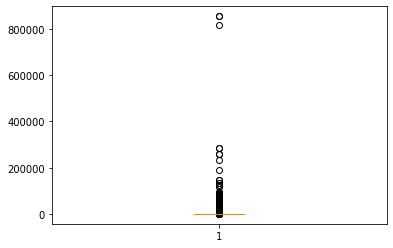

In [ ]:
plt.boxplot(fill_train['introelapse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc551c54110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc551c54b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc551c4eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc551c5a690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc551c5abd0>],
 'means': []}

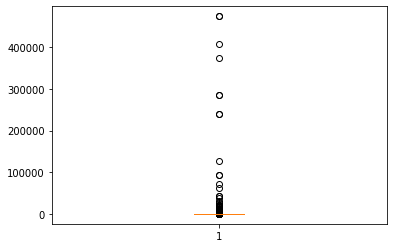

In [ ]:
plt.boxplot(fill_train['testelapse'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc551ce56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc551ceb190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc551ce5150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc551cebc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc551cf31d0>],
 'means': []}

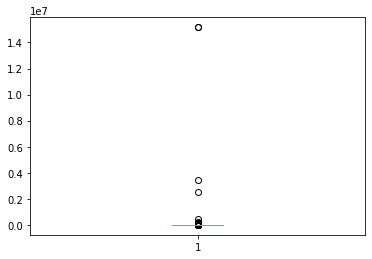

In [ ]:
plt.boxplot(fill_train['surveyelapse'])

In [30]:
for i in train.index:
  if train['introelapse'][i] >= train['introelapse'].median():
    train.loc[i,'intro_time'] = 1
  else:
    train.loc[i,'intro_time'] = 0 

  if train['testelapse'][i] >= train['testelapse'].median():
    train.loc[i,'test_time'] = 1
  else:
    train.loc[i,'test_time']=0


  if train['surveyelapse'][i] >= train['surveyelapse'].median():
    train.loc[i,'survey_time'] = 1
  else:
    train.loc[i,'survey_time'] = 0 

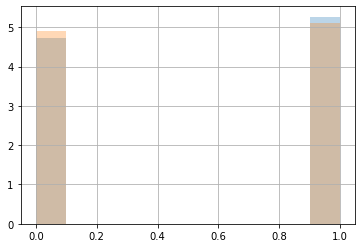

In [ ]:
train.loc[row_one,'intro_time'].hist(density=True,alpha=0.3,) #blue,
train.loc[row_zero,'intro_time'].hist(density=True,alpha=0.3,) #orange,

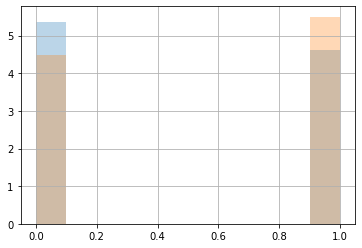

In [ ]:
train.loc[row_one,'test_time'].hist(density=True,alpha=0.3,) #blue, test time이 짧다 
train.loc[row_zero,'test_time'].hist(density=True,alpha=0.3,) #orange,

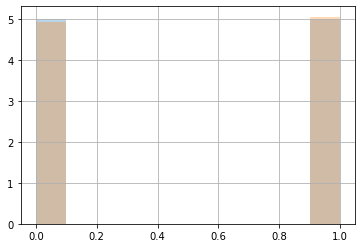

In [ ]:
train.loc[row_one,'survey_time'].hist(density=True,alpha=0.3,) #blue,
train.loc[row_zero,'survey_time'].hist(density=True,alpha=0.3,) #orange,

#Question 극단값

In [31]:
question = train.columns[0:26]

five= []
four= []
three = []
two = []
one = []
for i in train.index:
  val1 = 0
  val2 = 0
  val3 = 0
  val4 = 0 
  val5 = 0 
  for j in question:
    if train[j][i] == 1:
      val1+=1
    elif train[j][i] == 2:
      val2+=1
    elif train[j][i] == 3:
      val3+=1
    elif train[j][i] == 4:
      val4+=1
    elif train[j][i] == 5:
      val5+=1 
  one.append(val1/26)
  two.append(val2/26)
  three.append(val3/26)
  four.append(val4/26)
  five.append(val5/26)
      

In [32]:
train.loc[:,'val1']=one
train.loc[:,'val2']=two
train.loc[:,'val3']=three
train.loc[:,'val4']=four
train.loc[:,'val5']=five
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,small_familysize,new_age,intro_time,test_time,survey_time,val1,val2,val3,val4,val5
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,0,1.0,0.0,1.0,0.0,0.307692,0.000000,0.038462,0.038462,0.615385
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,0,0.0,0.0,0.0,0.0,0.192308,0.076923,0.192308,0.346154,0.192308
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,0,0.0,0.0,1.0,0.0,0.076923,0.192308,0.115385,0.192308,0.423077
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1,1.0,0.0,1.0,0.0,0.000000,0.192308,0.230769,0.461538,0.115385
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,1,1.0,0.0,1.0,1.0,0.038462,0.153846,0.192308,0.538462,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1,1.0,1.0,0.0,0.0,0.076923,0.192308,0.153846,0.461538,0.115385
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1,0.0,1.0,1.0,1.0,0.076923,0.038462,0.038462,0.461538,0.384615
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1,1.0,1.0,0.0,1.0,0.000000,0.038462,0.038462,0.192308,0.730769


#TIPI 값 별 

In [33]:
tipi = train.columns[30:40]

five= []
four= []
three = []
two = []
one = []
for i in train.index:
  val1 = 0
  val2 = 0
  val3 = 0
  val4 = 0 
  val5 = 0 
  for j in tipi:
    if train[j][i] == 1:
      val1+=1
    elif train[j][i] == 2:
      val2+=1
    elif train[j][i] == 3:
      val3+=1
    elif train[j][i] == 4:
      val4+=1
    elif train[j][i] == 5:
      val5+=1 
  one.append(val1/26)
  two.append(val2/26)
  three.append(val3/26)
  four.append(val4/26)
  five.append(val5/26)
      

In [34]:
train.loc[:,'tipi1']=one
train.loc[:,'tipi2']=two
train.loc[:,'tipi3']=three
train.loc[:,'tipi4']=four
train.loc[:,'tipi5']=five
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,val1,val2,val3,val4,val5,tipi1,tipi2,tipi3,tipi4,tipi5
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,0.307692,0.000000,0.038462,0.038462,0.615385,0.038462,0.000000,0.153846,0.038462,0.153846
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,0.192308,0.076923,0.192308,0.346154,0.192308,0.038462,0.153846,0.076923,0.038462,0.076923
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,0.076923,0.192308,0.115385,0.192308,0.423077,0.076923,0.076923,0.076923,0.038462,0.115385
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,0.000000,0.192308,0.230769,0.461538,0.115385,0.000000,0.000000,0.230769,0.115385,0.038462
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,0.038462,0.153846,0.192308,0.538462,0.076923,0.000000,0.038462,0.153846,0.192308,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,0.076923,0.192308,0.153846,0.461538,0.115385,0.000000,0.076923,0.230769,0.038462,0.038462
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,0.076923,0.038462,0.038462,0.461538,0.384615,0.038462,0.115385,0.076923,0.115385,0.038462
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,0.000000,0.038462,0.038462,0.192308,0.730769,0.153846,0.038462,0.115385,0.000000,0.076923


#q, tipi score 계산

In [35]:
train = train.fillna(0)

In [36]:
q = []
for i in train.columns[0:26]:
  q.append(i)
for i in train.index:
  train.loc[i,'score'] = sum(train.loc[i,q]) 
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,val2,val3,val4,val5,tipi1,tipi2,tipi3,tipi4,tipi5,score
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,0.000000,0.038462,0.038462,0.615385,0.038462,0.000000,0.153846,0.038462,0.153846,95.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,0.076923,0.192308,0.346154,0.192308,0.038462,0.153846,0.076923,0.038462,0.076923,85.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,0.192308,0.115385,0.192308,0.423077,0.076923,0.076923,0.076923,0.038462,0.115385,96.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,0.192308,0.230769,0.461538,0.115385,0.000000,0.000000,0.230769,0.115385,0.038462,91.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,0.153846,0.192308,0.538462,0.076923,0.000000,0.038462,0.153846,0.192308,0.000000,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,0.192308,0.153846,0.461538,0.115385,0.000000,0.076923,0.230769,0.038462,0.038462,87.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,0.038462,0.038462,0.461538,0.384615,0.038462,0.115385,0.076923,0.115385,0.038462,105.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,0.038462,0.038462,0.192308,0.730769,0.153846,0.038462,0.115385,0.000000,0.076923,120.0


In [37]:
#성실성: 3번,8번(reverse)
#친화성: 7번, 2번(reverse)
#정서적 안정성: 9번, 4번(reverse)
#경험 개방성: 5번, 10번(reverse)
#외향성: 1번, 6번(reverse)


for i in train.index:
  if train.loc[i,'TIPI8'] == 0:
    train.loc[i,'tipi_1'] = (train.loc[i,'TIPI3'] + (train.loc[i,'TIPI8']))/2
  train.loc[i,'tipi_1'] = (train.loc[i,'TIPI3'] + (6-train.loc[i,'TIPI8']))/2
  if train.loc[i,'TIPI2'] == 0:
    train.loc[i,'tipi_2'] = (train.loc[i,'TIPI7'] + (train.loc[i,'TIPI2']))/2
  train.loc[i,'tipi_2'] = (train.loc[i,'TIPI7'] + (6-train.loc[i,'TIPI2']))/2
  if train.loc[i,'TIPI4'] == 0:
    train.loc[i,'tipi_3'] = (train.loc[i,'TIPI9'] + (train.loc[i,'TIPI4']))/2
  train.loc[i,'tipi_3'] = (train.loc[i,'TIPI9'] + (6-train.loc[i,'TIPI4']))/2
  if train.loc[i,'TIPI10'] == 0:
    train.loc[i,'tipi_4'] = (train.loc[i,'TIPI5'] + (train.loc[i,'TIPI10']))/2
  train.loc[i,'tipi_4'] = (train.loc[i,'TIPI5'] + (6-train.loc[i,'TIPI10']))/2
  if train.loc[i,'TIPI6'] == 0:
    train.loc[i,'tipi_5'] = (train.loc[i,'TIPI1'] + (train.loc[i,'TIPI6']))/2
  train.loc[i,'tipi_5'] = (train.loc[i,'TIPI1'] + (6-train.loc[i,'TIPI6']))/2
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,tipi2,tipi3,tipi4,tipi5,score,tipi_1,tipi_2,tipi_3,tipi_4,tipi_5
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,0.000000,0.153846,0.038462,0.153846,95.0,4.0,4.0,5.0,3.0,2.5
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,0.153846,0.076923,0.038462,0.076923,85.0,4.0,4.5,1.5,3.5,4.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,0.076923,0.076923,0.038462,0.115385,96.0,2.5,3.5,5.0,4.5,1.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,0.000000,0.230769,0.115385,0.038462,91.0,2.5,3.5,2.5,4.0,3.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,0.038462,0.153846,0.192308,0.000000,90.0,3.0,3.0,2.5,4.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,0.076923,0.230769,0.038462,0.038462,87.0,3.5,3.5,3.0,3.0,1.5
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,0.115385,0.076923,0.115385,0.038462,105.0,4.5,4.0,1.5,4.0,3.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,0.038462,0.115385,0.000000,0.076923,120.0,2.5,3.0,1.0,3.0,1.0


#correlation 분석

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14994 entries, 0 to 14999
Data columns (total 98 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Q1                 14994 non-null  float64
 1   Q2                 14994 non-null  float64
 2   Q3                 14994 non-null  float64
 3   Q4                 14994 non-null  float64
 4   Q5                 14994 non-null  float64
 5   Q6                 14994 non-null  float64
 6   Q7                 14994 non-null  float64
 7   Q8                 14994 non-null  float64
 8   Q9                 14994 non-null  float64
 9   Q10                14994 non-null  float64
 10  Q11                14994 non-null  float64
 11  Q12                14994 non-null  float64
 12  Q13                14994 non-null  float64
 13  Q14                14994 non-null  float64
 14  Q15                14994 non-null  float64
 15  Q16                14994 non-null  float64
 16  Q17                149

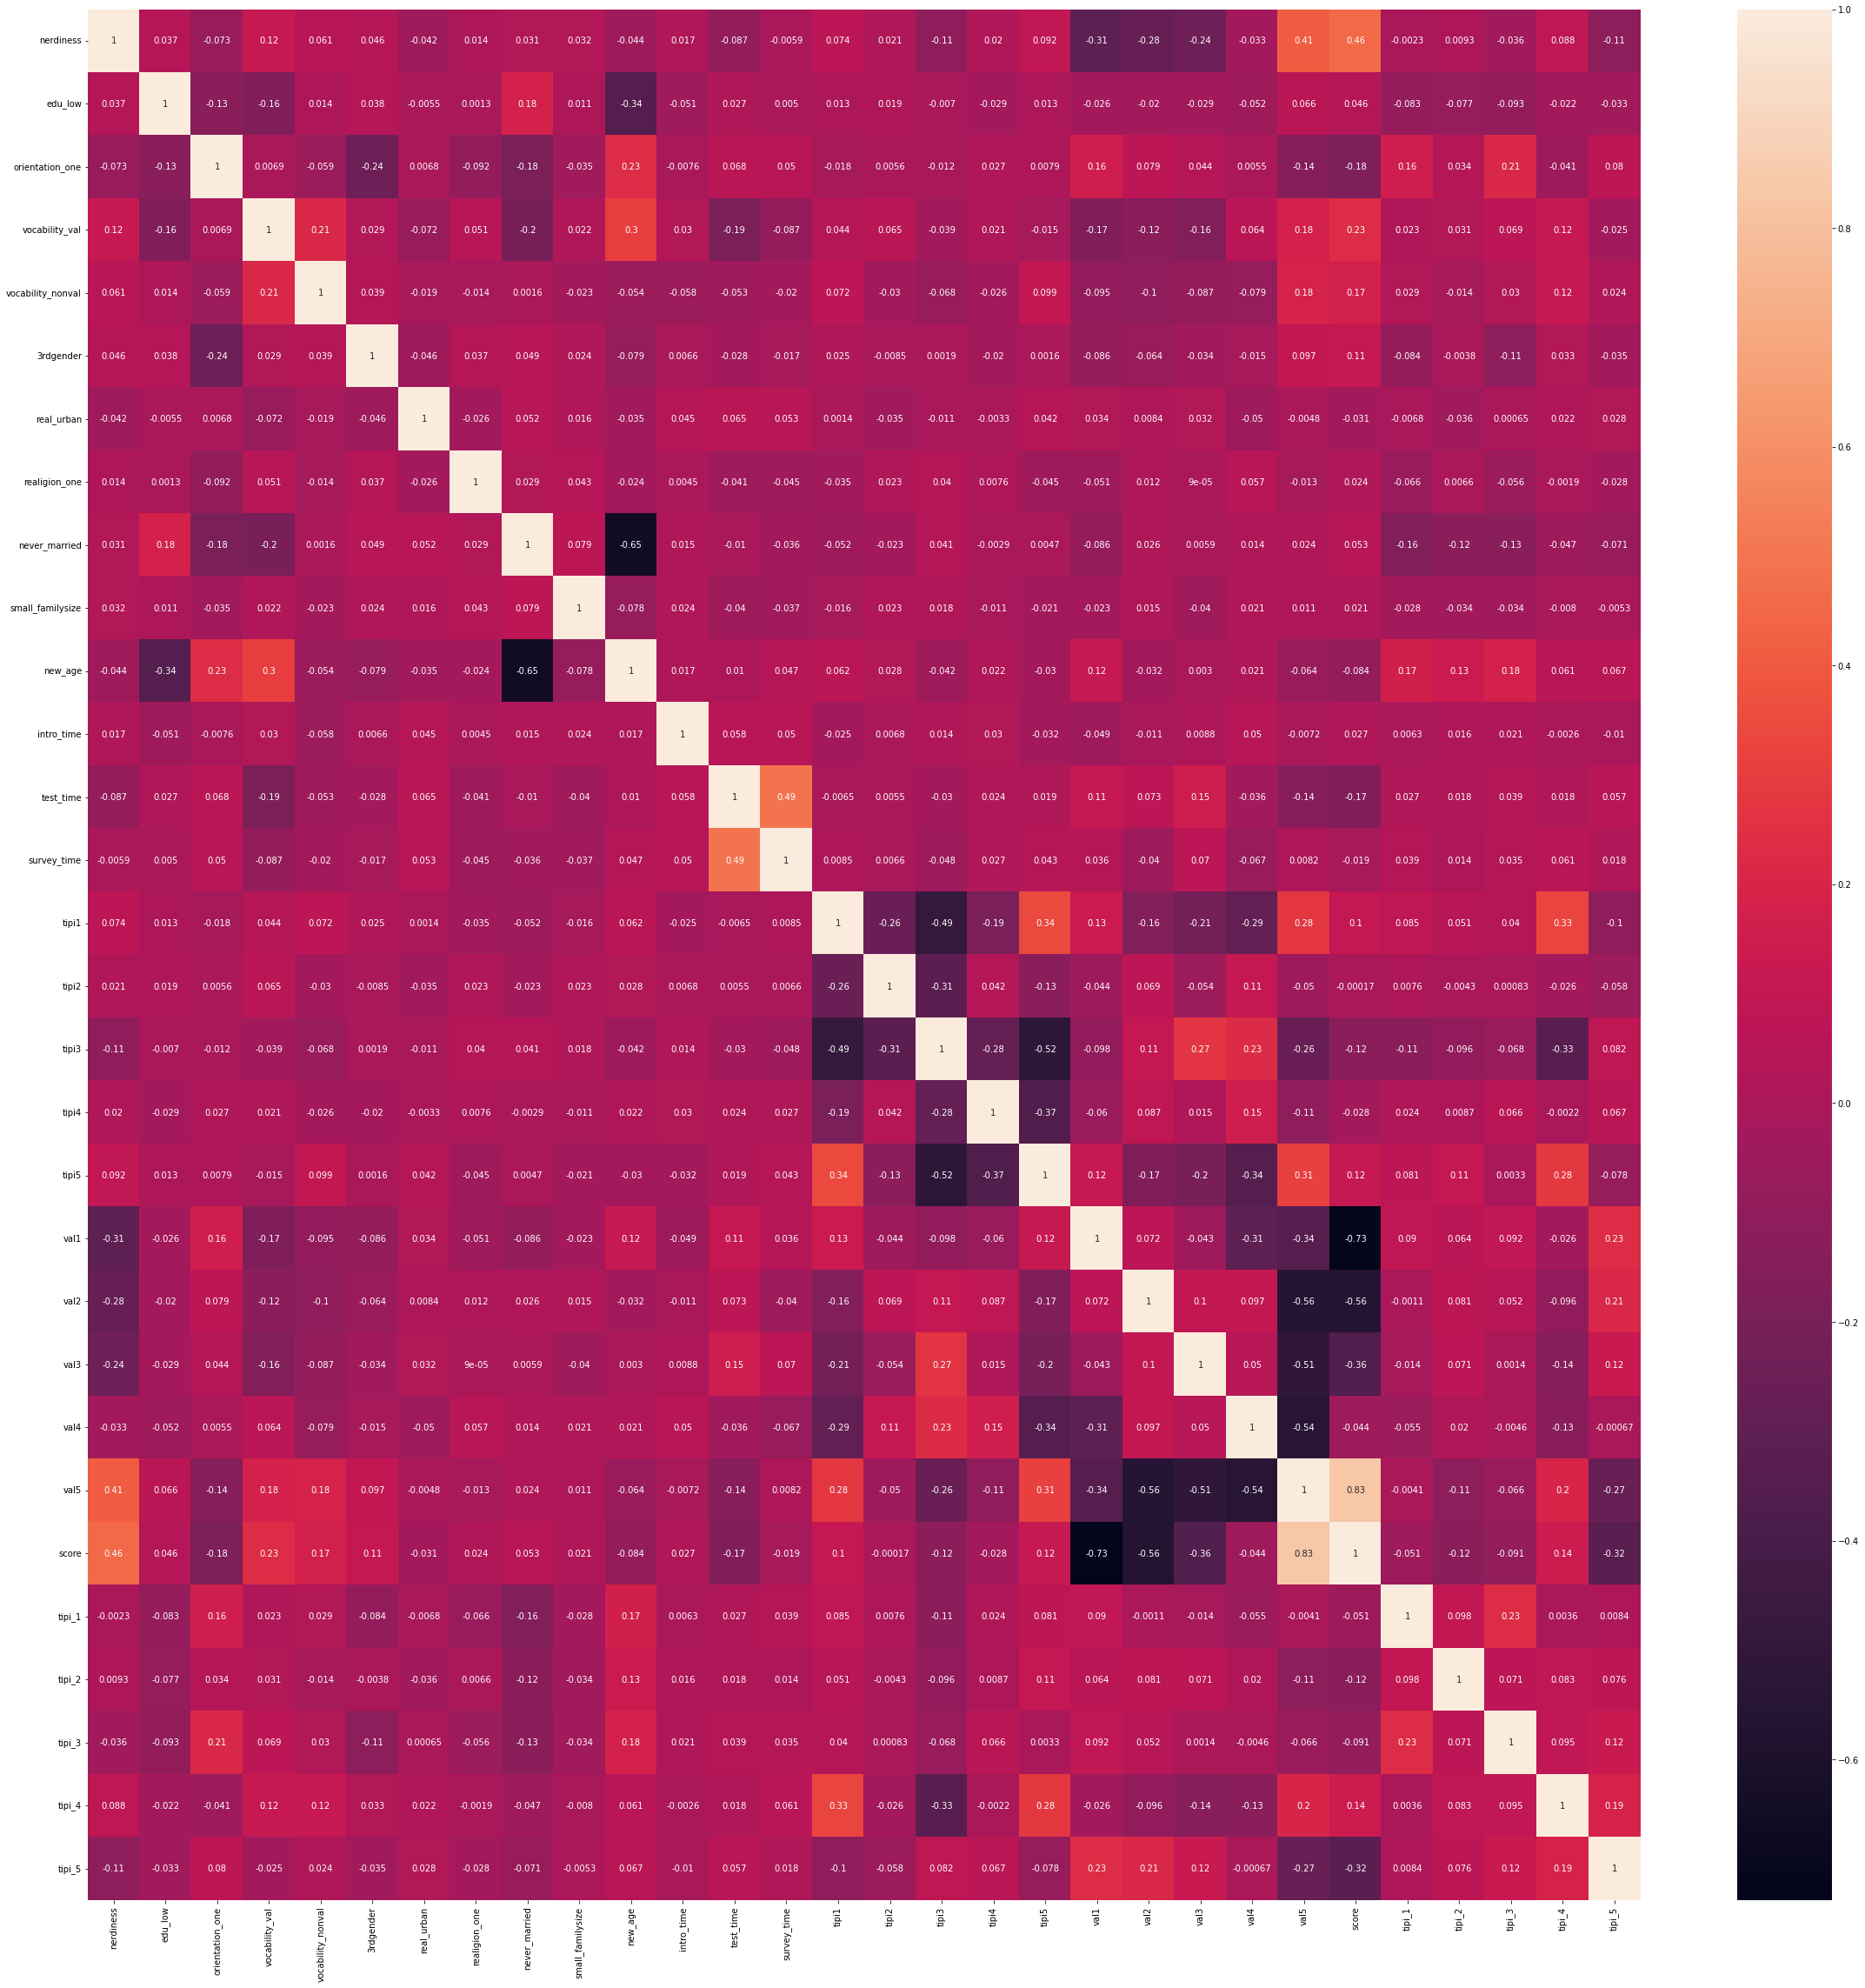

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,40))
col = train.columns[68:]
sns.heatmap(train.loc[:,col].corr(),
            annot=True
            )
plt.show()

In [66]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness', 'edu_low',
       'orientation_one', 'vocability_val', 'vocability_nonval', '3rdgender',
       'real_urban', 'realigion_one', 'never_married', 'small_familysize',
       'new_age', 'intro_time', 'test_time', 'survey_time', 'tipi1', 'tipi2',
       'tipi3', 'tipi4', 'tipi5', 'val1', 'val2', 'val3', 'val4', 'val5',
       'score', 'tipi_1', 't

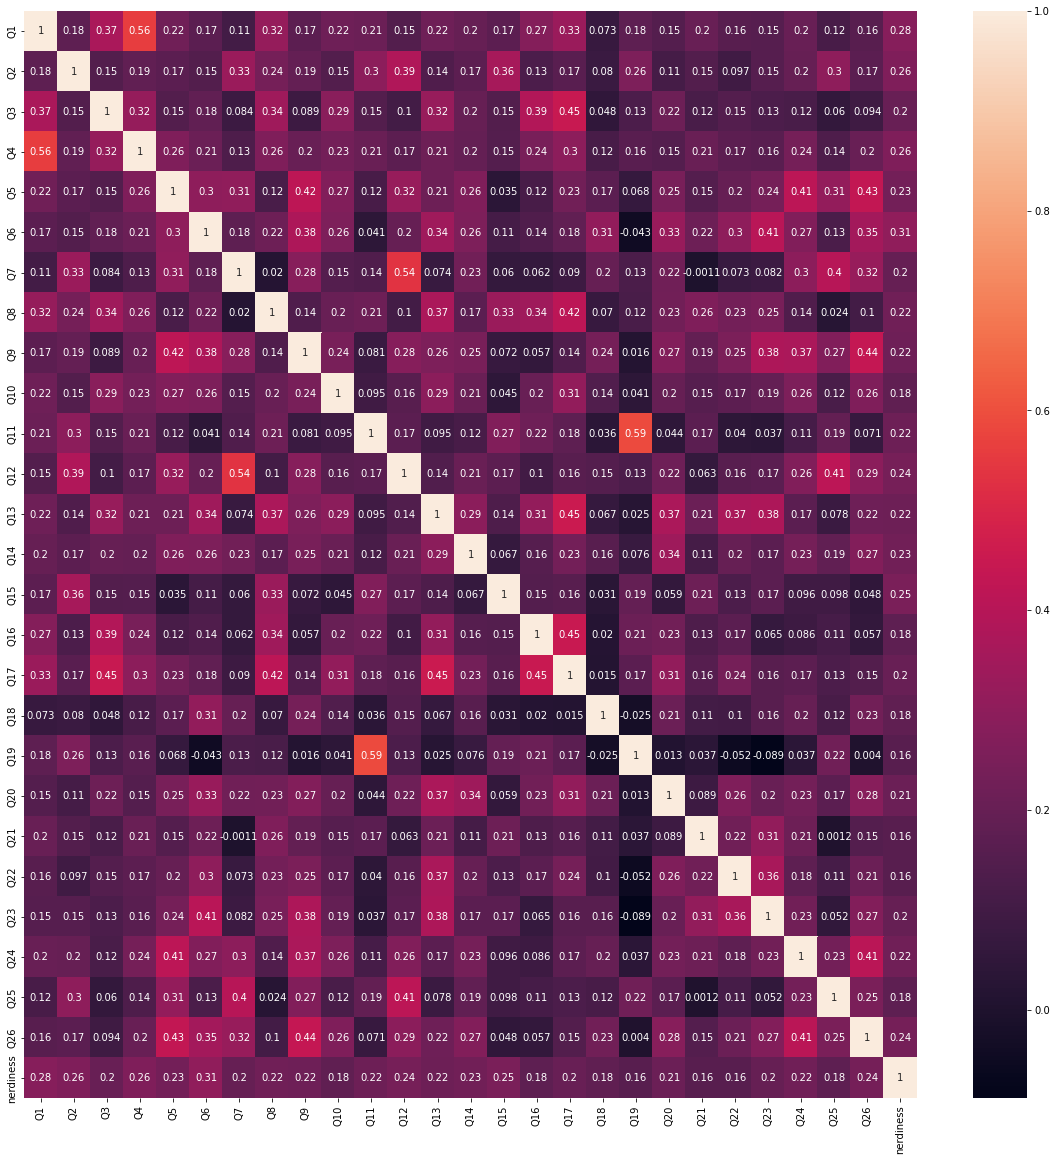

In [67]:

plt.figure(figsize=(20,20))
col = train.columns[:26]
col = list(col)
col.append('nerdiness')
sns.heatmap(train.loc[:,col].corr(),
            annot=True
            )
plt.show()

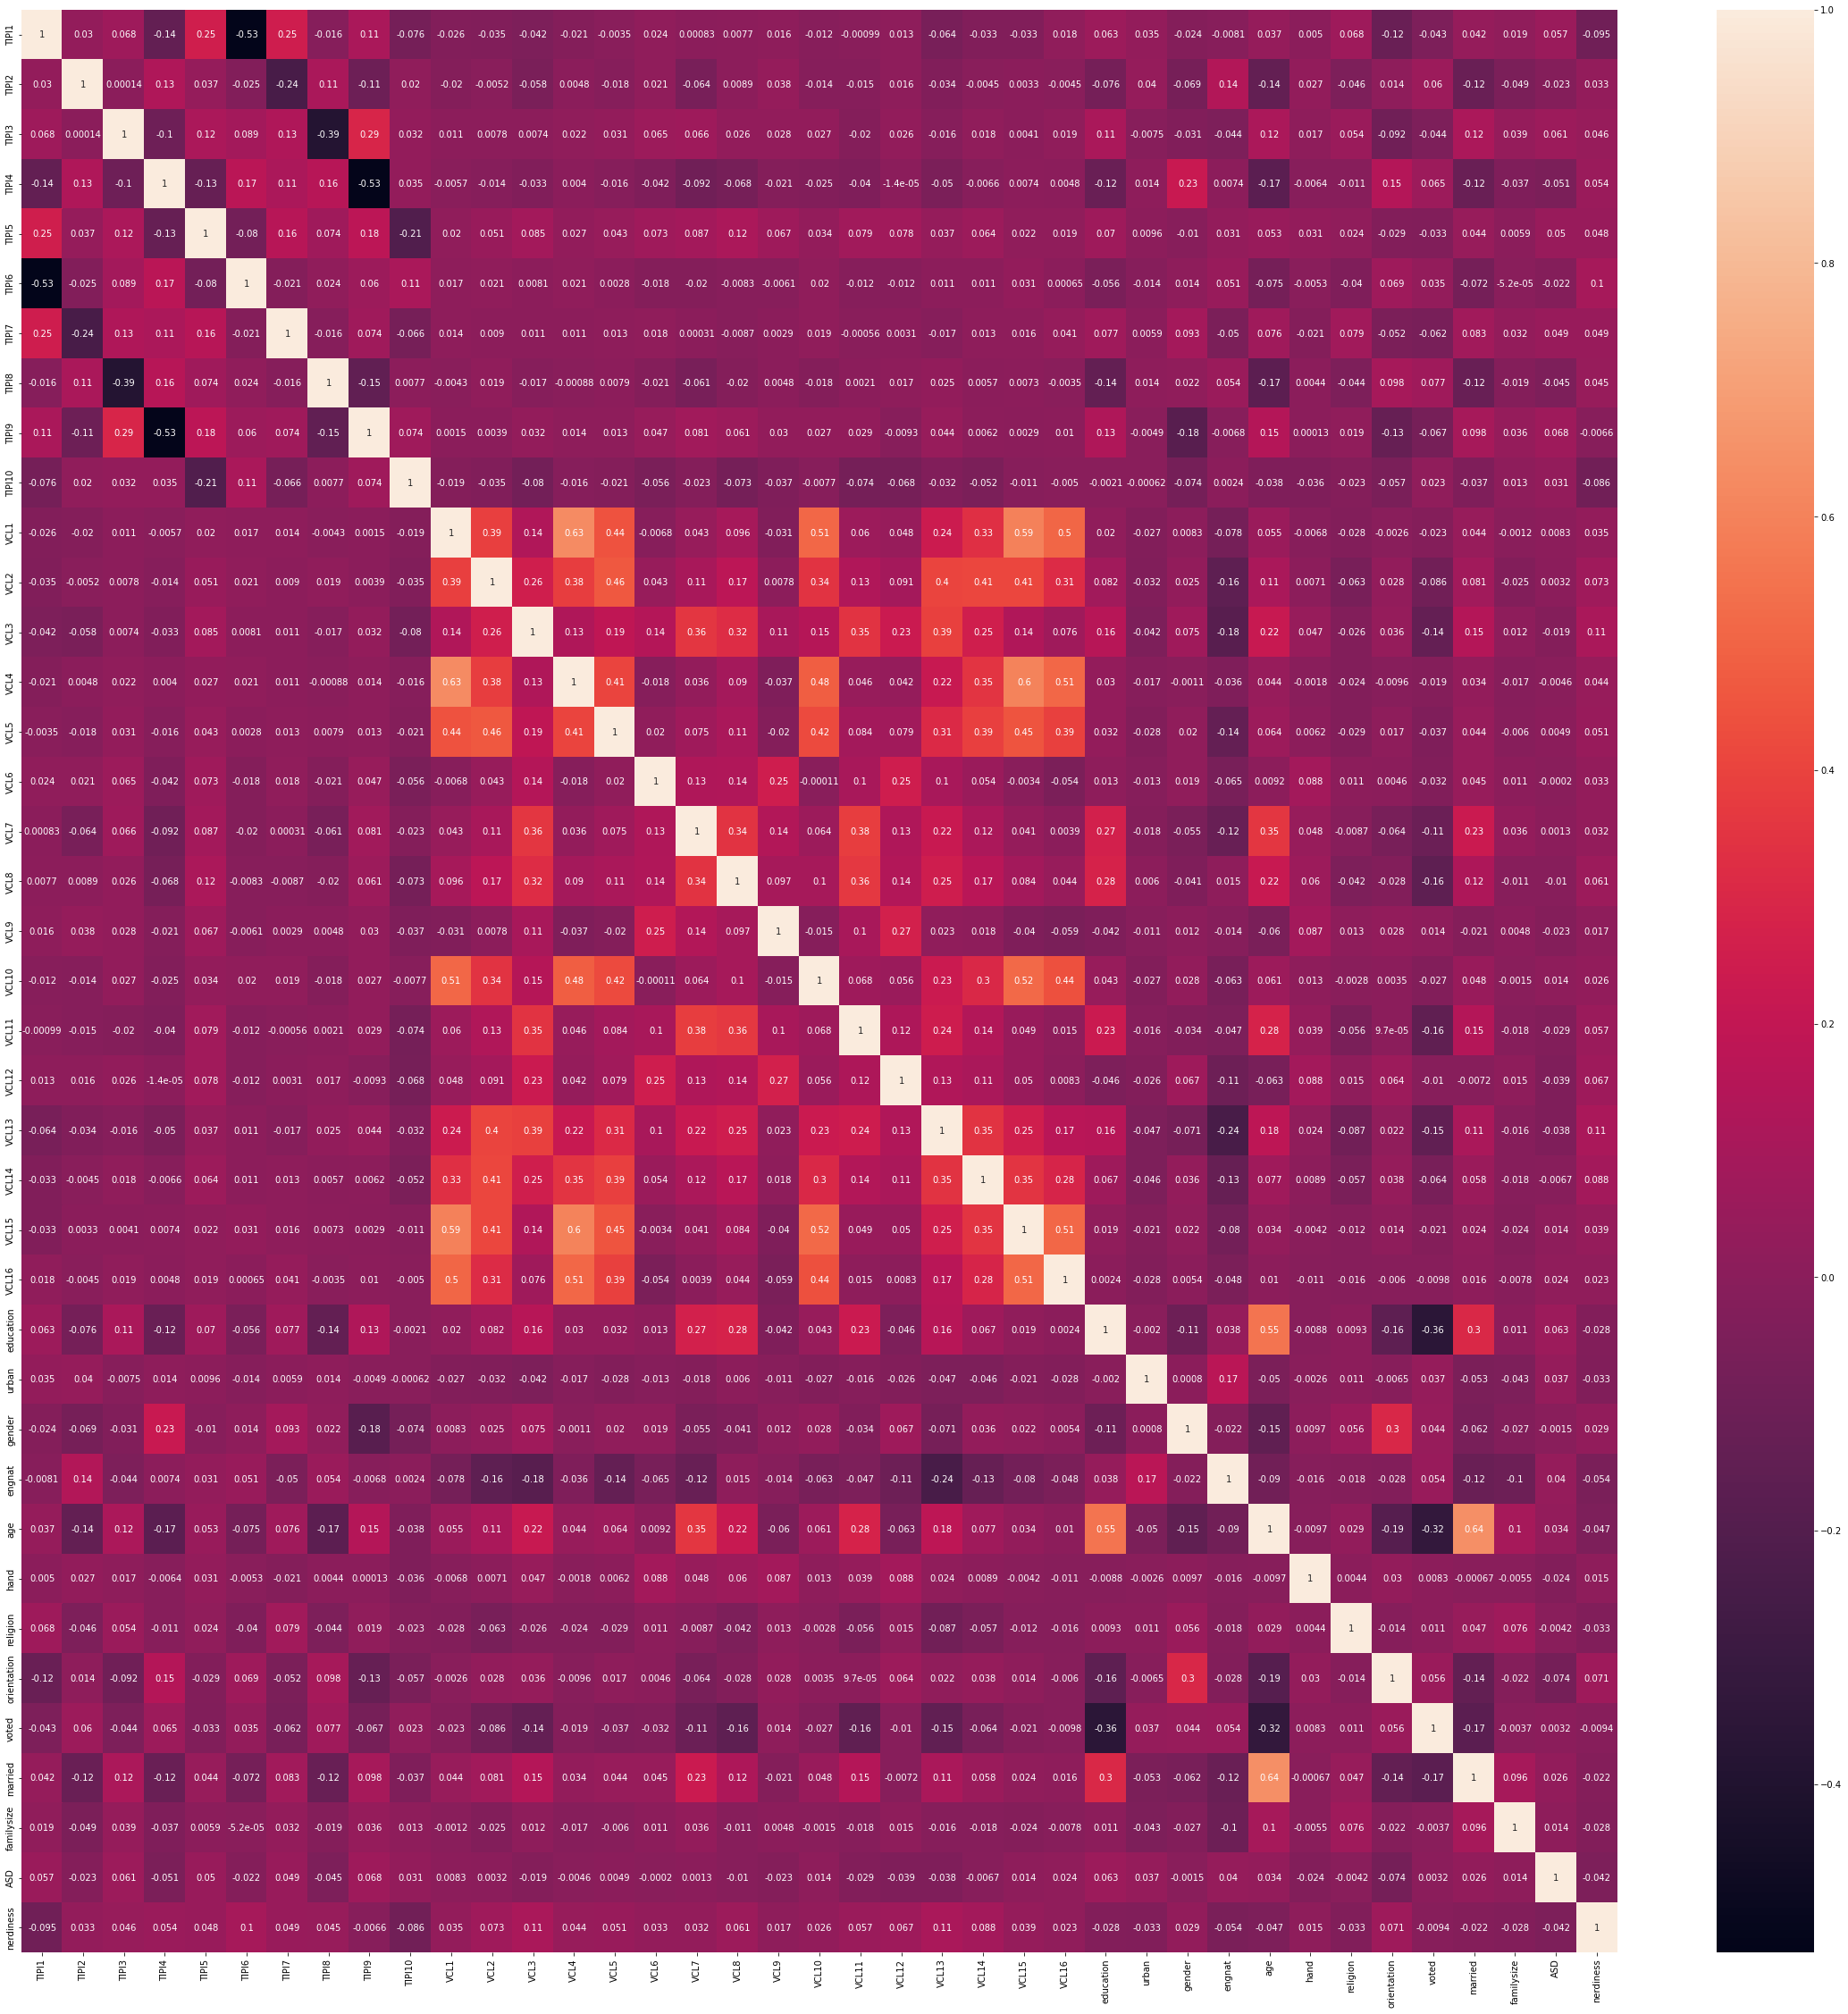

In [69]:

plt.figure(figsize=(40,40))
col = train.columns[30:69]
sns.heatmap(train.loc[:,col].corr(),
            annot=True
            )
plt.show()

In [71]:
train.columns


Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness', 'edu_low',
       'orientation_one', 'vocability_val', 'vocability_nonval', '3rdgender',
       'real_urban', 'realigion_one', 'never_married', 'small_familysize',
       'new_age', 'intro_time', 'test_time', 'survey_time', 'tipi1', 'tipi2',
       'tipi3', 'tipi4', 'tipi5', 'val1', 'val2', 'val3', 'val4', 'val5',
       'score', 'tipi_1', 't

In [104]:

from imblearn.over_sampling import SMOTE
y = train['nerdiness']
X= train.loc[:,['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'tipi1','tipi2','tipi3','tipi4','tipi5','val1','val5','score',]]
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X,y)

In [105]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled , test_size = 0.2)

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
import numpy as np
np.random.seed(3)
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.8130081300813008
